In [115]:
import pandas as pd
import numpy as np

In [141]:
df = pd.DataFrame({
    'Product ID': pd.to_numeric([101,101,102,103,104,105,106,107,108,109,110], downcast='integer'),
    'Product Name': ['Laptop A0','Laptop A', 'Smartphone B', 'Tablet C', 'Smarwatch D', 'Camara E', 'Headphones F', 'Speaker G', 'Monitor H', 'Mouse I','Keyboard J'],
    'Category': pd.Categorical(['Electronics', 'Electronics','Electronics', 'Electronics', 'Electronics', 'Electronics', 'Accessories', 'Accessories', 'Electronics', 'Accessories', 'Accessories']),
    'Precio': pd.to_numeric([1500,1200,800,300,200,500,150,100,400,50,75], downcast='float'),
    'Quantity Sold': pd.to_numeric([2,10,24,15,20,5,30,22,12,35,18], downcast='integer'),
    'Revenue': pd.to_numeric([11000,12000,20000,4500,4000,2500,4500,2200,4800,1750,1350], downcast='float'),
    'Return Rate': pd.to_numeric([3.5,5.0,3.0,8.0,2.0,4.5,7.0,6.0,3.5,9.0,5.5], downcast='float'),
    'Date Added': pd.to_datetime(['2023-12-31','2024-01-15', '2024-02-18', '2024-03-10', '2024-04-09', '2024-05-21', '2024-06-02', '2024-07-25', '2024-08-14', '2024-09-19', '2024-10-30']),
    'In Stock': pd.Categorical(['Yes','Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'])
})


In [142]:
print(df.dtypes)

Product ID                 int8
Product Name             object
Category               category
Precio                  float32
Quantity Sold              int8
Revenue                 float32
Return Rate             float32
Date Added       datetime64[ns]
In Stock               category
dtype: object


In [143]:
df.head(10)

,Product ID,Product Name,Category,Precio,Quantity Sold,Revenue,Return Rate,Date Added,In Stock
0,101,Laptop A0,Electronics,1500.0,2,11000.0,3.5,2023-12-31,Yes
1,101,Laptop A,Electronics,1200.0,10,12000.0,5.0,2024-01-15,Yes
2,102,Smartphone B,Electronics,800.0,24,20000.0,3.0,2024-02-18,Yes
3,103,Tablet C,Electronics,300.0,15,4500.0,8.0,2024-03-10,No
4,104,Smarwatch D,Electronics,200.0,20,4000.0,2.0,2024-04-09,Yes
5,105,Camara E,Electronics,500.0,5,2500.0,4.5,2024-05-21,Yes
6,106,Headphones F,Accessories,150.0,30,4500.0,7.0,2024-06-02,No
7,107,Speaker G,Accessories,100.0,22,2200.0,6.0,2024-07-25,Yes
8,108,Monitor H,Electronics,400.0,12,4800.0,3.5,2024-08-14,No
9,109,Mouse I,Accessories,50.0,35,1750.0,9.0,2024-09-19,Yes


In [144]:
print(df.dtypes)

Product ID                 int8
Product Name             object
Category               category
Precio                  float32
Quantity Sold              int8
Revenue                 float32
Return Rate             float32
Date Added       datetime64[ns]
In Stock               category
dtype: object


In [145]:
print(df['Product ID'])

0     101
1     101
2     102
3     103
4     104
5     105
6     106
7     107
8     108
9     109
10    110
Name: Product ID, dtype: int8


In [146]:
# astype(): Se usa para cambiar el tipo de dato de una columna. Esto será útil cuando queramos reducir el tipo de dato a uno más eficiente como pasar de int64 a int8
df['Product ID'] = df['Product ID'].astype('int32')

In [147]:
print(df['Product ID'])

0     101
1     101
2     102
3     103
4     104
5     105
6     106
7     107
8     108
9     109
10    110
Name: Product ID, dtype: int32


In [148]:
df['Precio'] = df['Precio'].astype('float64')
print(df['Precio'])

0     1500.0
1     1200.0
2      800.0
3      300.0
4      200.0
5      500.0
6      150.0
7      100.0
8      400.0
9       50.0
10      75.0
Name: Precio, dtype: float64


In [149]:
df['Product ID'] = df['Product ID'].astype('int8')
df['Precio'] = df['Precio'].astype('float32')

In [150]:
print("Valores unicos de 'Price' antes de crear 'Price_Category':\n", df['Precio'].unique())

Valores unicos de 'Price' antes de crear 'Price_Category':
 [1500. 1200.  800.  300.  200.  500.  150.  100.  400.   50.   75.]


In [151]:
# np.select: Nos va a servir para poder filtrar una columna con distintas condiciones
conditions = [(df['Precio']>1000), (df['Precio']<=1000) & (df['Precio']>500), (df['Precio']<=500)]

choices = ['Hight Price', 'Medium Price', 'Low Price']
df['Price_Category'] = np.select(conditions, choices, default='Unknown')
# np.select(conditions, choices, default='Unknown') -> Evalúa cada fila del DataFrame 'df', aplica la primera condición verdadera, y asigna el valor correspondiente
# Si ninguna condición es verdadera, asigna el valor de default

In [152]:
print("\nDistribucion de categorias de precio:\n", df['Price_Category'].value_counts())


Distribucion de categorias de precio:
 Price_Category
Low Price       8
Hight Price     2
Medium Price    1
Name: count, dtype: int64


In [153]:
df['Price_Category'] = df['Price_Category'].astype('category')
print(df.dtypes)

Product ID                  int8
Product Name              object
Category                category
Precio                   float32
Quantity Sold               int8
Revenue                  float32
Return Rate              float32
Date Added        datetime64[ns]
In Stock                category
Price_Category          category
dtype: object


In [154]:
df.head(10)

,Product ID,Product Name,Category,Precio,Quantity Sold,Revenue,Return Rate,Date Added,In Stock,Price_Category
0,101,Laptop A0,Electronics,1500.0,2,11000.0,3.5,2023-12-31,Yes,Hight Price
1,101,Laptop A,Electronics,1200.0,10,12000.0,5.0,2024-01-15,Yes,Hight Price
2,102,Smartphone B,Electronics,800.0,24,20000.0,3.0,2024-02-18,Yes,Medium Price
3,103,Tablet C,Electronics,300.0,15,4500.0,8.0,2024-03-10,No,Low Price
4,104,Smarwatch D,Electronics,200.0,20,4000.0,2.0,2024-04-09,Yes,Low Price
5,105,Camara E,Electronics,500.0,5,2500.0,4.5,2024-05-21,Yes,Low Price
6,106,Headphones F,Accessories,150.0,30,4500.0,7.0,2024-06-02,No,Low Price
7,107,Speaker G,Accessories,100.0,22,2200.0,6.0,2024-07-25,Yes,Low Price
8,108,Monitor H,Electronics,400.0,12,4800.0,3.5,2024-08-14,No,Low Price
9,109,Mouse I,Accessories,50.0,35,1750.0,9.0,2024-09-19,Yes,Low Price


In [155]:
print("Valores nulos en 'Return Rate':\n", df['Return Rate'].isna().sum())

Valores nulos en 'Return Rate':
 0


In [156]:
df['Return Rate'] = df['Return Rate'].ffill()
print(df['Return Rate'])

0     3.5
1     5.0
2     3.0
3     8.0
4     2.0
5     4.5
6     7.0
7     6.0
8     3.5
9     9.0
10    5.5
Name: Return Rate, dtype: float32


In [157]:
# Pandas -> NaN (Not a Number) -> Representa valores faltantes o indefinidos en 'datos numericos' (float) 
# Pandas -> None (valor nulo) en tipos de datos no numericos (cadenas de texto y categorias ) -> Representa valores faltantes 

In [158]:
print(df.dtypes)

Product ID                  int8
Product Name              object
Category                category
Precio                   float32
Quantity Sold               int8
Revenue                  float32
Return Rate              float32
Date Added        datetime64[ns]
In Stock                category
Price_Category          category
dtype: object


In [159]:
df.loc[2, 'Return Rate'] = np.nan # Insertar NaN en la fila 2 de la columa Return Rate
df.loc[6, 'Return Rate'] = np.nan # Insertar NaN en la fila 2 de la columa Return Rate
df.loc[3, 'Return Rate'] = np.nan # Insertar NaN en la fila 2 de la columa Return Rate

df.loc[2, 'Price_Category'] = None # Insertar NaN en la fila 2 de la columa Return Rate
df.loc[6, 'Price_Category'] = None # Insertar NaN en la fila 2 de la columa Return Rate

df.head(6)

,Product ID,Product Name,Category,Precio,Quantity Sold,Revenue,Return Rate,Date Added,In Stock,Price_Category
0,101,Laptop A0,Electronics,1500.0,2,11000.0,3.5,2023-12-31,Yes,Hight Price
1,101,Laptop A,Electronics,1200.0,10,12000.0,5.0,2024-01-15,Yes,Hight Price
2,102,Smartphone B,Electronics,800.0,24,20000.0,NaN,2024-02-18,Yes,NaN
3,103,Tablet C,Electronics,300.0,15,4500.0,NaN,2024-03-10,No,Low Price
4,104,Smarwatch D,Electronics,200.0,20,4000.0,2.0,2024-04-09,Yes,Low Price
5,105,Camara E,Electronics,500.0,5,2500.0,4.5,2024-05-21,Yes,Low Price


In [160]:
print("Valores nulos en 'Return Rate':\n", df['Return Rate'].isna().sum())

Valores nulos en 'Return Rate':
 3


In [161]:
print("Valores nulos en el DataFrame 'df':\n", df.isna().sum())

Valores nulos en el DataFrame 'df':
 Product ID        0
Product Name      0
Category          0
Precio            0
Quantity Sold     0
Revenue           0
Return Rate       3
Date Added        0
In Stock          0
Price_Category    2
dtype: int64


In [162]:
df['Return Rate'].head(10)

0    3.5
1    5.0
2    NaN
3    NaN
4    2.0
5    4.5
6    NaN
7    6.0
8    3.5
9    9.0
Name: Return Rate, dtype: float32

In [163]:
df['Return Rate'] = df['Return Rate'].ffill()
df['Return Rate'].head(10)

0    3.5
1    5.0
2    5.0
3    5.0
4    2.0
5    4.5
6    4.5
7    6.0
8    3.5
9    9.0
Name: Return Rate, dtype: float32

In [164]:
# Contabilizar valores duplicados
print("Numero de filas duplicadas:\n", df.duplicated(subset=['Product ID']).sum())

Numero de filas duplicadas:
 1


In [165]:
df.head()

,Product ID,Product Name,Category,Precio,Quantity Sold,Revenue,Return Rate,Date Added,In Stock,Price_Category
0,101,Laptop A0,Electronics,1500.0,2,11000.0,3.5,2023-12-31,Yes,Hight Price
1,101,Laptop A,Electronics,1200.0,10,12000.0,5.0,2024-01-15,Yes,Hight Price
2,102,Smartphone B,Electronics,800.0,24,20000.0,5.0,2024-02-18,Yes,NaN
3,103,Tablet C,Electronics,300.0,15,4500.0,5.0,2024-03-10,No,Low Price
4,104,Smarwatch D,Electronics,200.0,20,4000.0,2.0,2024-04-09,Yes,Low Price


In [168]:
# Eliminar duplicados con drop_duplicates
df.drop_duplicates(subset=['Product ID'], keep='first', inplace=True)
df.head()

,Product ID,Product Name,Category,Precio,Quantity Sold,Revenue,Return Rate,Date Added,In Stock,Price_Category
0,101,Laptop A0,Electronics,1500.0,2,11000.0,3.5,2023-12-31,Yes,Hight Price
2,102,Smartphone B,Electronics,800.0,24,20000.0,5.0,2024-02-18,Yes,NaN
3,103,Tablet C,Electronics,300.0,15,4500.0,5.0,2024-03-10,No,Low Price
4,104,Smarwatch D,Electronics,200.0,20,4000.0,2.0,2024-04-09,Yes,Low Price
5,105,Camara E,Electronics,500.0,5,2500.0,4.5,2024-05-21,Yes,Low Price


In [169]:
# Realizar la division de columnas y guardamos el resultado en una nueva columna
df['Revenue per Unit'] = np.divide(df['Revenue'], df['Quantity Sold'])
df.head()

,Product ID,Product Name,Category,Precio,Quantity Sold,Revenue,Return Rate,Date Added,In Stock,Price_Category,Revenue per Unit
0,101,Laptop A0,Electronics,1500.0,2,11000.0,3.5,2023-12-31,Yes,Hight Price,5500.000000
2,102,Smartphone B,Electronics,800.0,24,20000.0,5.0,2024-02-18,Yes,NaN,833.333313
3,103,Tablet C,Electronics,300.0,15,4500.0,5.0,2024-03-10,No,Low Price,300.000000
4,104,Smarwatch D,Electronics,200.0,20,4000.0,2.0,2024-04-09,Yes,Low Price,200.000000
5,105,Camara E,Electronics,500.0,5,2500.0,4.5,2024-05-21,Yes,Low Price,500.000000


In [170]:
print(df.dtypes)

Product ID                    int8
Product Name                object
Category                  category
Precio                     float32
Quantity Sold                 int8
Revenue                    float32
Return Rate                float32
Date Added          datetime64[ns]
In Stock                  category
Price_Category            category
Revenue per Unit           float32
dtype: object


In [176]:
df_filtered = df.query('Precio>200 and `In Stock` == "Yes"') # Cuando la columan tiene espacios en el nombre, se coloca comillas invertidas
#df_filtered = df.query('Precio>200 and Category == "Electronics"')
df_filtered.head()

,Product ID,Product Name,Category,Precio,Quantity Sold,Revenue,Return Rate,Date Added,In Stock,Price_Category,Revenue per Unit
0,101,Laptop A0,Electronics,1500.0,2,11000.0,3.5,2023-12-31,Yes,Hight Price,5500.000000
2,102,Smartphone B,Electronics,800.0,24,20000.0,5.0,2024-02-18,Yes,NaN,833.333313
5,105,Camara E,Electronics,500.0,5,2500.0,4.5,2024-05-21,Yes,Low Price,500.000000


In [183]:
df.head(15)

,Product ID,Product Name,Category,Precio,Quantity Sold,Revenue,Return Rate,Date Added,In Stock,Price_Category,Revenue per Unit
0,101,Laptop A0,Electronics,1500.0,2,11000.0,3.5,2023-12-31,Yes,Hight Price,5500.000000
2,102,Smartphone B,Electronics,800.0,24,20000.0,5.0,2024-02-18,Yes,NaN,833.333313
3,103,Tablet C,Electronics,300.0,15,4500.0,5.0,2024-03-10,No,Low Price,300.000000
4,104,Smarwatch D,Electronics,200.0,20,4000.0,2.0,2024-04-09,Yes,Low Price,200.000000
5,105,Camara E,Electronics,500.0,5,2500.0,4.5,2024-05-21,Yes,Low Price,500.000000
6,106,Headphones F,Accessories,150.0,30,4500.0,4.5,2024-06-02,No,NaN,150.000000
7,107,Speaker G,Accessories,100.0,22,2200.0,6.0,2024-07-25,Yes,Low Price,100.000000
8,108,Monitor H,Electronics,400.0,12,4800.0,3.5,2024-08-14,No,Low Price,400.000000
9,109,Mouse I,Accessories,50.0,35,1750.0,9.0,2024-09-19,Yes,Low Price,50.000000
10,110,Keyboard J,Accessories,75.0,18,1350.0,5.5,2024-10-30,No,Low Price,75.000000


In [185]:
df_filtered_precio = df.query('Category == "Accessories" and `In Stock` == "Yes"')
df_filtered_precio.head()

,Product ID,Product Name,Category,Precio,Quantity Sold,Revenue,Return Rate,Date Added,In Stock,Price_Category,Revenue per Unit
7,107,Speaker G,Accessories,100.0,22,2200.0,6.0,2024-07-25,Yes,Low Price,100.0
9,109,Mouse I,Accessories,50.0,35,1750.0,9.0,2024-09-19,Yes,Low Price,50.0


In [186]:
df_filtered_precio = df.query('Category == "Accessories" and `In Stock` == "No"')
df_filtered_precio.head()

,Product ID,Product Name,Category,Precio,Quantity Sold,Revenue,Return Rate,Date Added,In Stock,Price_Category,Revenue per Unit
6,106,Headphones F,Accessories,150.0,30,4500.0,4.5,2024-06-02,No,NaN,150.0
10,110,Keyboard J,Accessories,75.0,18,1350.0,5.5,2024-10-30,No,Low Price,75.0


In [187]:
# Resumen Dinamico
pivot = df.pivot_table(values='Precio', index='Category', columns='In Stock', aggfunc='sum', fill_value=0, observed=False)
print(pivot)

In Stock        No     Yes
Category                  
Accessories  225.0   150.0
Electronics  700.0  3000.0


In [190]:
df.head()

,Product ID,Product Name,Category,Precio,Quantity Sold,Revenue,Return Rate,Date Added,In Stock,Price_Category,Revenue per Unit
0,101,Laptop A0,Electronics,1500.0,2,11000.0,3.5,2023-12-31,Yes,Hight Price,5500.000000
2,102,Smartphone B,Electronics,800.0,24,20000.0,5.0,2024-02-18,Yes,NaN,833.333313
3,103,Tablet C,Electronics,300.0,15,4500.0,5.0,2024-03-10,No,Low Price,300.000000
4,104,Smarwatch D,Electronics,200.0,20,4000.0,2.0,2024-04-09,Yes,Low Price,200.000000
5,105,Camara E,Electronics,500.0,5,2500.0,4.5,2024-05-21,Yes,Low Price,500.000000


In [ ]:
# Evaluar la eficiencia de expresiones
#df = df.assign(Discounted_Revenue=pd.eval("Revenue * (1 - 0.1)"))
#df.head()

In [192]:
df['Price_Category'] = pd.cut(df['Precio'], bins=[0,100,500,1000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])
df.head(10)

,Product ID,Product Name,Category,Precio,Quantity Sold,Revenue,Return Rate,Date Added,In Stock,Price_Category,Revenue per Unit
0,101,Laptop A0,Electronics,1500.0,2,11000.0,3.5,2023-12-31,Yes,Very High,5500.000000
2,102,Smartphone B,Electronics,800.0,24,20000.0,5.0,2024-02-18,Yes,High,833.333313
3,103,Tablet C,Electronics,300.0,15,4500.0,5.0,2024-03-10,No,Medium,300.000000
4,104,Smarwatch D,Electronics,200.0,20,4000.0,2.0,2024-04-09,Yes,Medium,200.000000
5,105,Camara E,Electronics,500.0,5,2500.0,4.5,2024-05-21,Yes,Medium,500.000000
6,106,Headphones F,Accessories,150.0,30,4500.0,4.5,2024-06-02,No,Medium,150.000000
7,107,Speaker G,Accessories,100.0,22,2200.0,6.0,2024-07-25,Yes,Low,100.000000
8,108,Monitor H,Electronics,400.0,12,4800.0,3.5,2024-08-14,No,Medium,400.000000
9,109,Mouse I,Accessories,50.0,35,1750.0,9.0,2024-09-19,Yes,Low,50.000000
10,110,Keyboard J,Accessories,75.0,18,1350.0,5.5,2024-10-30,No,Low,75.000000


In [193]:
# Definicios de Conceptos Clave

# PCA (Análisis de Componentes Principales)
#   -> Es una técnica de reducción de dimensionalidad que transforma un cojunto de variables posiblementes correlacionales en un conjunto de variables no correlacionales
#   -> PCA va a funcionar identificando las direcciones (componentes principales) en la que los datos varían más. 
#   -> Se utiliza para poder simplificar los modelos, reducir el rudio en los datos, y visualizar datos de alta dimensionalidad en 2 o 3 dimensiones

# KMeans Clustering
#   -> Es un algoritmo de Clustering no supervisado que agrupa los datos en k clusters en funcion de similitud (distancia euclidiana)
#   -> Inicializa k centroides aleatoriamente y asigna cada punto de datos al centroide mas cercano
#   -> Se utiliza para encontrar patrones y subgrupos en datos sin etiquetar, segmentación de mercado, compresión de datos, etc

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:
features = ['Precio', 'Revenue', 'Return Rate']
df[features].head()

,Precio,Revenue,Return Rate
0,1500.0,11000.0,3.5
2,800.0,20000.0,5.0
3,300.0,4500.0,5.0
4,200.0,4000.0,2.0
5,500.0,2500.0,4.5


In [200]:
features = ['Precio', 'Revenue', 'Return Rate']
x = StandardScaler().fit_transform(df[features])

kmeans = KMeans(n_clusters=2)
df['Cluster'] = kmeans.fit_predict(x)

pca = PCA(n_components = 2)
df_pca = pd.DataFrame(pca.fit_transform(x), columns=['PC1', 'PC2'])

df_pca.head()


C:\Users\usernanno2\anaconda3\envs\Python_Mod_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,PC1,PC2
0,2.628041,0.179996
1,2.193125,1.393477
2,-0.334559,-0.060772
3,0.189494,-1.641253
4,-0.128166,-0.396714


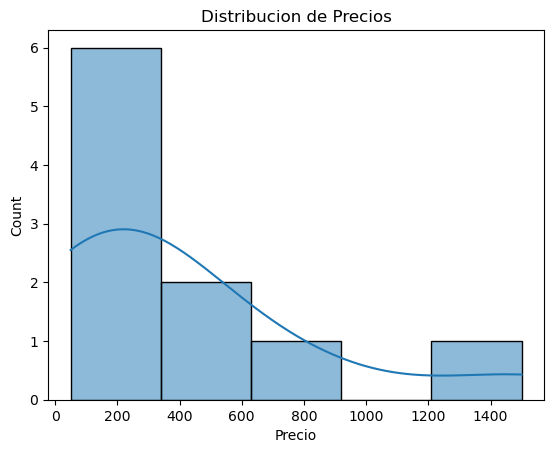

In [201]:
# VISUALIZACION DE RESULTADOS
sns.histplot(df['Precio'], kde=True)
plt.title('Distribucion de Precios')
plt.show()


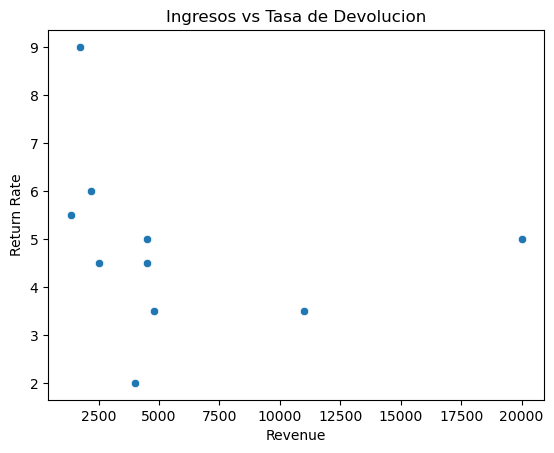

In [202]:
sns.scatterplot(x='Revenue', y='Return Rate', data=df)
plt.title("Ingresos vs Tasa de Devolucion")
plt.show()

In [203]:
df.head(100)

,Product ID,Product Name,Category,Precio,Quantity Sold,Revenue,Return Rate,Date Added,In Stock,Price_Category,Revenue per Unit,Cluster
0,101,Laptop A0,Electronics,1500.0,2,11000.0,3.5,2023-12-31,Yes,Very High,5500.000000,0
2,102,Smartphone B,Electronics,800.0,24,20000.0,5.0,2024-02-18,Yes,High,833.333313,0
3,103,Tablet C,Electronics,300.0,15,4500.0,5.0,2024-03-10,No,Medium,300.000000,1
4,104,Smarwatch D,Electronics,200.0,20,4000.0,2.0,2024-04-09,Yes,Medium,200.000000,1
5,105,Camara E,Electronics,500.0,5,2500.0,4.5,2024-05-21,Yes,Medium,500.000000,1
6,106,Headphones F,Accessories,150.0,30,4500.0,4.5,2024-06-02,No,Medium,150.000000,1
7,107,Speaker G,Accessories,100.0,22,2200.0,6.0,2024-07-25,Yes,Low,100.000000,1
8,108,Monitor H,Electronics,400.0,12,4800.0,3.5,2024-08-14,No,Medium,400.000000,1
9,109,Mouse I,Accessories,50.0,35,1750.0,9.0,2024-09-19,Yes,Low,50.000000,1
10,110,Keyboard J,Accessories,75.0,18,1350.0,5.5,2024-10-30,No,Low,75.000000,1


In [205]:
df.to_csv('sales_data.csv', index=False, chunksize=10000)

In [206]:
df_2 = pd.read_csv('sales_data.csv')
df_2.head()

,Product ID,Product Name,Category,Precio,Quantity Sold,Revenue,Return Rate,Date Added,In Stock,Price_Category,Revenue per Unit,Cluster
0,101,Laptop A0,Electronics,1500.0,2,11000.0,3.5,2023-12-31,Yes,Very High,5500.0000,0
1,102,Smartphone B,Electronics,800.0,24,20000.0,5.0,2024-02-18,Yes,High,833.3333,0
2,103,Tablet C,Electronics,300.0,15,4500.0,5.0,2024-03-10,No,Medium,300.0000,1
3,104,Smarwatch D,Electronics,200.0,20,4000.0,2.0,2024-04-09,Yes,Medium,200.0000,1
4,105,Camara E,Electronics,500.0,5,2500.0,4.5,2024-05-21,Yes,Medium,500.0000,1


In [207]:
# Analisis de Memoria
memory_usage = df.memory_usage(deep=True)
print(memory_usage)

Index                80
Product ID           10
Product Name        585
Category            238
Precio               40
Quantity Sold        10
Revenue              40
Return Rate          40
Date Added           80
In Stock            221
Price_Category      400
Revenue per Unit     40
Cluster              40
dtype: int64
